In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("tickets.csv")

In [3]:
df["ticket"][3]

'test-vm-01: VMware: VM CPU Usage Has Exceeded Threshold (95%), currently (100.0%)'

In [4]:
df["ticket"][100].split(":")[1]

' Device Failed Availability Check'

In [5]:
df["ticket"][3][0:4]

'test'

In [6]:
def take_main_fail(text):
    try:
        if text[0:4] == 'test':
            end_text = text.split(":")[2:]
        else:
            end_text = text.split(":")[1:]
    except:
        end_text = text
    
    return end_text

In [7]:
df["main_text"] = df["ticket"].apply(lambda x :take_main_fail(x))

In [8]:
df["len_texts"] = df["main_text"].apply(lambda x : len(x))

In [9]:
df1 = df[df["len_texts"]==5]
df1.shape

(88, 3)

In [10]:
def make_text(x):
    if len(x) == 5:
        my_list = []
        for i in x:
            a = len(i)
            my_list.append(a)

        my_list.sort(reverse=True)
        main_list = my_list[:2]
        main_text = []
        for i in x:
            if main_list[0] == len(i):
                main_text.append(i)
            elif main_list[1] == len(i):
                main_text.append(i)

        return "nothing"
    elif len(x) == 6:
        return ' '.join(x[2:])
    elif len(x)==4:
        return x[0]
    elif len(x)==3:
        return x[0]
    elif len(x)==2:
        return ' '.join(x)
    elif len(x)==2:
        return x[0]
    else:
        return "nothing"

In [11]:
df["new"] = df["main_text"].apply(lambda x : make_text(x))

In [12]:
df["new"][0]

'nothing'

In [13]:
df1 = df[df["new"]!="nothing"]

In [14]:
df_problem_msg = df1.drop(["ticket","main_text","len_texts"],axis=1)

In [15]:
df_problem_msg

,new
1,Interface state changed to operationally down
2,Device Failed Availability Check UDP - SNMP
4,Device Failed Availability Check
5,Device Failed Availability Check
6,Required service not running Tomcat7
...,...
5439,Required service not running Tomcat7
5440,Host Resource Physical Memory has exceeded t...
5441,Device Failed Availability Check UDP - SNMP
5442,Host Resource Physical Memory has exceeded t...


In [16]:
df_problem_msg["new1"] = df_problem_msg["new"].apply(lambda x : x.lower())

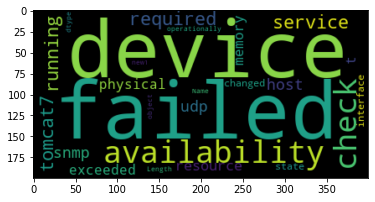

In [17]:
ws = WordCloud()
ws.generate(str(df_problem_msg["new1"]))
plt.imshow(ws, interpolation='bilinear')

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_problem_msg["new1"])

Text(0.5, 1.0, 'Finding optimal K kluster')

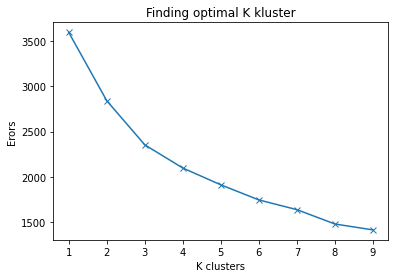

In [20]:
wss=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X.toarray())
    wss.append(kmean.inertia_)

plt.plot(K,wss,marker='x')
plt.xlabel('K clusters')
plt.ylabel('Erors')
plt.title("Finding optimal K kluster")

In [21]:
X.toarray().min()

0.0

In [22]:
model = GaussianMixture(n_components=7)
labels = model.fit_predict(X.toarray())

In [23]:
df_problem_msg['clusters'] = labels

In [24]:
df_problem_msg["clusters"].unique()

array([5, 2, 1, 3, 0, 6, 4])

In [50]:
df_test_clst = df_problem_msg[df_problem_msg["clusters"]==6]

In [51]:
df_test_clst.head()

,new,new1,clusters
16,Filesystem unavailable '/dev/fslv01' on Devi...,filesystem unavailable '/dev/fslv01' on devi...,6
40,Filesystem unavailable '/dev/hd1' on Device ...,filesystem unavailable '/dev/hd1' on device ...,6
117,Filesystem unavailable,filesystem unavailable,6
129,Filesystem unavailable '/var' on Device '4890',filesystem unavailable '/var' on device '4890',6
162,Filesystem unavailable '/dev/hd1' on Device ...,filesystem unavailable '/dev/hd1' on device ...,6


In [54]:
data = [int(df_problem_msg[df_problem_msg["clusters"]==0].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==1].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==2].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==3].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==4].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==5].shape[0]),int(df_problem_msg[df_problem_msg["clusters"]==6].shape[0])]

In [53]:
int(df_problem_msg[df_problem_msg["clusters"]==6].shape[0])

235